# Performance validation of Electrical Impedance Tomography Images using Random Forest Classifier - Machine Learning

## Copyright (c) 2018, Faststream Technologies
## Author: Sudhanva Narayana

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### CURR and PARENT directory constants

In [2]:
CURR_DIR = os.path.dirname(os.path.abspath('__file__'))
PARENT_DIR = os.path.abspath(os.path.join(CURR_DIR, os.pardir))

### Import dataset ignoring headers

In [3]:
df = pd.read_csv(PARENT_DIR + '\\assets\\datasets\\eit_data.csv', index_col=[0], header = [0], skiprows= [1] ,skipinitialspace=True)

### Dataset

In [4]:
df.head()

,gray,violet,blue,green,yellow,orange,red,brown,target
0,5012,0,66475,0,0,51548,0,104101,1
1,8461,0,84013,0,0,42614,0,92048,0
2,27101,0,45398,0,0,51277,0,103360,1
3,23992,0,79882,0,0,40349,0,82913,0
4,15075,0,61161,0,0,57718,0,93182,1


### Visualise the higher intensities

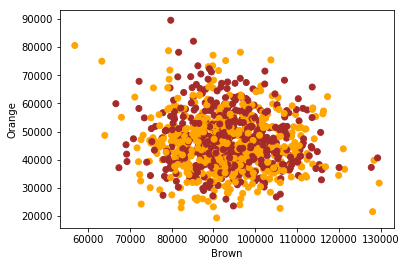

In [5]:
plt.scatter(df['brown'], df['orange'], c=['brown', 'orange'])
plt.xlabel("Brown")
plt.ylabel("Orange")
plt.show()

### Importing dataset

In [6]:
X = df.loc[:, ['gray', 'violet', 'blue', 'green', 'yellow', 'orange', 'red', 'brown']].values.astype(float)
y = df.loc[:, ['target']].values

### Splitting the dataset into the Training set and Test set (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
y_train = y_train.ravel()

### Feature Scaling

In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fitting classifier to the Training set

In [10]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

print(classifier.score(X_test, y_test))

1.0


### The Confusion Matrix

In [12]:
print(confusion_matrix(y_test, y_pred))

[[ 52   0]
 [  0 198]]


In [13]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       1.00      1.00      1.00       198

avg / total       1.00      1.00      1.00       250



### Visualising different values of N Estimators (Trees) Overfitting/Underfitting

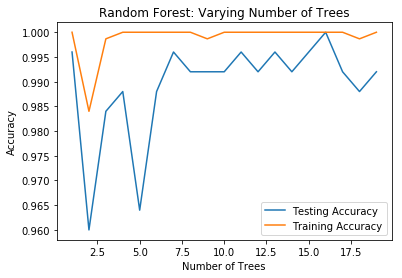

In [14]:
# Setup arrays to store train and test accuracies
estimators = np.arange(1, 20)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

# Loop over different values of k
for i, k in enumerate(estimators):
    # Setup a RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=k)

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = random_forest.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = random_forest.score(X_test, y_test)

# Generate plot
plt.title('Random Forest: Varying Number of Trees')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()